In [42]:
import torch
import torchvision
from torchvision import transforms, datasets
import time
import re

In [43]:
import torch.nn as nn
import torch.nn.functional as F

In [44]:
import os
import cv2
import numpy as np
from tqdm.notebook import tqdm

In [46]:
REBUILD_DATA = True

class RigidVSNonrigid():
    IMG_SIZE=28
    RIGID = "Images/Rigid/Composite"
    NONRIGID = "Images/NonRigid/Composite"
    LABELS = {RIGID: 0, NONRIGID: 1}
    
    training_data = []
    rigidcount = 0
    nonrigidcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            pbar = tqdm(sorted(os.listdir(label),key=lambda f: int(re.sub('\D', '', f))))
            for f in pbar:
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

                    if label == self.RIGID:
                        self.rigidcount += 1
                    elif label == self.NONRIGID:
                        self.nonrigidcount += 1
                    else:
                        print(label)
                        print(self.RIGID)
                        print(self.NONRIGID)
                except Exception as e:
                    print(e)
                    pass
        #np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Rigid:",self.rigidcount)
        print("Nonrigid:",self.nonrigidcount)

        
if REBUILD_DATA:
    rigidvnonrigid = RigidVSNonrigid()
    rigidvnonrigid.make_training_data()
                    

Images/Rigid/Composite



Images/NonRigid/Composite



Rigid: 60000
Nonrigid: 60000


In [25]:
training_data = np.load("training_data.npy",allow_pickle=True)

In [26]:
print(len(training_data))

120000


In [29]:
print(training_data[14][1])

[1. 0.]


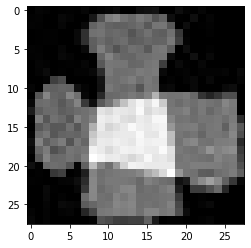

In [30]:
import matplotlib.pyplot as plt

plt.imshow(training_data[14][0],cmap="gray")
plt.show()